# 1. 导入数据

趋势组名 : temporary group\
持续时间 : 31-00:00:00\
时间间隔 : 20.00Sec\
\
MW : 发电机功率值\
3UCCSPT : 机前压力\
3U03TEA : A侧主蒸汽温\
3UZQFT : 主蒸汽流量\
3U05TE01 : 中缸进汽温度\
3U06PT04 : 再热器入口压力\
3U80FT04 : 一级减温水B侧流量\
3U80FT05 : 二级减温水A侧流量\
3U80FT09 : 再热器微量喷水A侧流量\
3U78TE02A : A空预器出口排烟温度平均值\
3U78TE02B : B空预器出口排烟温度平均值\
3UD5NAO032 : A空预器出口氧量\
30ACO0001 : A侧脱硝入口CO\
D21P61B03 : A入口NOx折算\
3U28M04AFT : 给煤机A瞬时流量\
3U28M04BFT : 给煤机B瞬时流量\
3U28M04CFT : 给煤机C瞬时流量\
3U28M04DFT : 给煤机D瞬时流量\
3U71MCV07AK : A角二次风总门开度\
3U71MCV07BK : B角二次风总门开度\
3U71MCV07CK : C角二次风总门开度\
3U71MCV07DK : D角二次风总门开度\
3USOFABJ1ZT : A角燃尽风门摆动度\
3UTAFF : 送风机总风量\
3U72PT04 : 空预器出口一次风母管压力\
3UBCFHHTL : B侧空预器出口飞灰含碳量

In [201]:
import pandas as pd
import numpy as np
import torch
from visualization import plot_curve

In [202]:
data = pd.read_csv('DATA3.csv', sep=';', header=0)

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_61312\186611676.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('DATA3.csv', sep=';', header=0)


# 2. 检查数据类型

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133921 entries, 0 to 133920
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   日期           133921 non-null  object 
 1   时间           133921 non-null  object 
 2   MW           133921 non-null  float64
 3   3UCCSPT      133921 non-null  float64
 4   3U03TEA      133921 non-null  float64
 5   3UZQFT       133921 non-null  float64
 6   3U05TE01     133921 non-null  float64
 7   3U06PT04     133921 non-null  float64
 8   3U80FT04     133921 non-null  float64
 9   3U80FT05     133921 non-null  float64
 10  3UTAFF       133921 non-null  float64
 11  3U72PT04     133921 non-null  float64
 12  3UBCFHHTL    133921 non-null  float64
 13  3UD5NAO032   133921 non-null  float64
 14  3U28M04AFT   133921 non-null  float64
 15  3U28M04BFT   133921 non-null  float64
 16  3U28M04CFT   133921 non-null  float64
 17  3U28M04DFT   133921 non-null  float64
 18  3U71MCV07AK  133921 non-

In [204]:
data['DATETIME'] = pd.to_datetime(data['日期'] + ' ' + data['时间'], format='%d/%m/%Y %H:%M:%S')

In [205]:
data = data.drop(columns=['日期', '时间'])

In [206]:
data['30ACO0001'] = data['30ACO0001'].replace({',': ''}, regex=True).astype(float)
data['D21P61B03'] = data['D21P61B03'].replace({',': ''}, regex=True).astype(float)

In [207]:
print(data.dtypes)

MW                    float64
3UCCSPT               float64
3U03TEA               float64
3UZQFT                float64
3U05TE01              float64
3U06PT04              float64
3U80FT04              float64
3U80FT05              float64
3UTAFF                float64
3U72PT04              float64
3UBCFHHTL             float64
3UD5NAO032            float64
3U28M04AFT            float64
3U28M04BFT            float64
3U28M04CFT            float64
3U28M04DFT            float64
3U71MCV07AK           float64
3U71MCV07BK           float64
3U71MCV07CK           float64
3U71MCV07DK           float64
3USOFABJ1ZT           float64
3U78TE02A             float64
3U78TE02B             float64
30ACO0001             float64
D21P61B03             float64
DATETIME       datetime64[ns]
dtype: object


# 3. 检查负值

In [208]:
data.describe()

,MW,3UCCSPT,3U03TEA,3UZQFT,3U05TE01,3U06PT04,3U80FT04,3U80FT05,3UTAFF,3U72PT04,...,3U71MCV07AK,3U71MCV07BK,3U71MCV07CK,3U71MCV07DK,3USOFABJ1ZT,3U78TE02A,3U78TE02B,30ACO0001,D21P61B03,DATETIME
count,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,...,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921
mean,95.723240,6.646919,240.474231,282.486591,230.678657,1.108769,4.916618,0.173064,91.417468,1.345800,...,100.411672,100.407255,100.272707,99.691573,14.345317,66.782209,68.412778,98.694862,1105.219125,2024-07-16 12:00:00.000000512
min,-0.080000,-0.057000,24.833000,0.000000,19.247000,-0.070000,0.000000,0.000000,0.000000,-0.341000,...,0.781000,2.620000,2.995000,0.228000,0.000000,20.039000,12.308000,0.153000,-176.630000,2024-07-01 00:00:00
25%,0.000000,0.016000,27.079000,0.814000,20.737000,0.009000,1.263000,0.000000,16.584000,-0.094000,...,100.228000,100.065000,100.260000,99.642000,0.000000,23.482000,23.613000,13.885000,651.882000,2024-07-08 18:00:00
50%,0.000000,0.024000,35.990000,0.814000,21.416000,0.009000,1.786000,0.000000,17.166000,-0.092000,...,100.521000,100.260000,100.260000,99.674000,24.863000,25.236000,25.627000,118.630000,970.190000,2024-07-16 12:00:00
75%,236.770000,16.455000,539.979000,693.337000,529.373000,2.717000,9.075000,0.090000,197.898000,3.346000,...,100.553000,100.781000,100.293000,99.740000,24.863000,128.403000,131.790000,133.811000,1306.521000,2024-07-24 06:00:00
max,272.190000,16.846000,552.621000,821.677000,537.183000,3.167000,21.746000,5.018000,286.061000,3.958000,...,100.716000,100.944000,100.391000,99.870000,24.863000,137.810000,142.589000,1001.221000,6056.352000,2024-08-01 00:00:00
std,117.329864,7.951198,250.501015,344.910252,249.131464,1.345268,4.799438,0.315809,93.880722,1.698132,...,0.536236,0.612632,0.560805,0.515267,12.283347,51.401850,53.119061,74.511347,590.643707,NaN


In [209]:
negative_counts = (data.drop(columns=['DATETIME']) < 0).sum()
negative_counts

MW                90
3UCCSPT           74
3U03TEA            0
3UZQFT             0
3U05TE01           0
3U06PT04         275
3U80FT04           0
3U80FT05           0
3UTAFF             0
3U72PT04       77019
3UBCFHHTL        842
3UD5NAO032         0
3U28M04AFT     86608
3U28M04BFT         0
3U28M04CFT     79372
3U28M04DFT     61145
3U71MCV07AK        0
3U71MCV07BK        0
3U71MCV07CK        0
3U71MCV07DK        0
3USOFABJ1ZT        0
3U78TE02A          0
3U78TE02B          0
30ACO0001          0
D21P61B03         15
dtype: int64

In [210]:
data.loc[:, data.columns != 'DATETIME'] = data.loc[:, data.columns != 'DATETIME'].clip(lower=0)

In [211]:
zero_counts = data.drop(columns=['DATETIME']).apply(lambda col: (col == 0).sum())
zero_counts

MW              79146
3UCCSPT            86
3U03TEA             0
3UZQFT            770
3U05TE01            0
3U06PT04          289
3U80FT04            2
3U80FT05       100173
3UTAFF          19160
3U72PT04        77019
3UBCFHHTL        4013
3UD5NAO032          0
3U28M04AFT      86617
3U28M04BFT          0
3U28M04CFT      79747
3U28M04DFT      61145
3U71MCV07AK         0
3U71MCV07BK         0
3U71MCV07CK         0
3U71MCV07DK         0
3USOFABJ1ZT     56652
3U78TE02A           0
3U78TE02B           0
30ACO0001           0
D21P61B03          15
dtype: int64

# 4. 数据预处理

In [212]:
data.describe()

,MW,3UCCSPT,3U03TEA,3UZQFT,3U05TE01,3U06PT04,3U80FT04,3U80FT05,3UTAFF,3U72PT04,...,3U71MCV07AK,3U71MCV07BK,3U71MCV07CK,3U71MCV07DK,3USOFABJ1ZT,3U78TE02A,3U78TE02B,30ACO0001,D21P61B03,DATETIME
count,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,...,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921.000000,133921
mean,95.723243,6.646939,240.474231,282.486591,230.678657,1.108842,4.916618,0.173064,91.417468,1.401251,...,100.411672,100.407255,100.272707,99.691573,14.345317,66.782209,68.412778,98.694862,1105.231650,2024-07-16 12:00:00.000000512
min,0.000000,0.000000,24.833000,0.000000,19.247000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.781000,2.620000,2.995000,0.228000,0.000000,20.039000,12.308000,0.153000,0.000000,2024-07-01 00:00:00
25%,0.000000,0.016000,27.079000,0.814000,20.737000,0.009000,1.263000,0.000000,16.584000,0.000000,...,100.228000,100.065000,100.260000,99.642000,0.000000,23.482000,23.613000,13.885000,651.882000,2024-07-08 18:00:00
50%,0.000000,0.024000,35.990000,0.814000,21.416000,0.009000,1.786000,0.000000,17.166000,0.000000,...,100.521000,100.260000,100.260000,99.674000,24.863000,25.236000,25.627000,118.630000,970.190000,2024-07-16 12:00:00
75%,236.770000,16.455000,539.979000,693.337000,529.373000,2.717000,9.075000,0.090000,197.898000,3.346000,...,100.553000,100.781000,100.293000,99.740000,24.863000,128.403000,131.790000,133.811000,1306.521000,2024-07-24 06:00:00
max,272.190000,16.846000,552.621000,821.677000,537.183000,3.167000,21.746000,5.018000,286.061000,3.958000,...,100.716000,100.944000,100.391000,99.870000,24.863000,137.810000,142.589000,1001.221000,6056.352000,2024-08-01 00:00:00
std,117.329861,7.951181,250.501015,344.910252,249.131464,1.345206,4.799438,0.315809,93.880722,1.651015,...,0.536236,0.612632,0.560805,0.515267,12.283347,51.401850,53.119061,74.511347,590.618628,NaN


In [213]:
nox = data["D21P61B03"] #NOx浓度
co = data["30ACO0001"] #CO浓度
atem = data["3U78TE02A"] #A排烟温度
btem = data["3U78TE02B"] #B排烟温度
o2 = data["3UD5NAO032"] #省煤器出口氧量
load = data["MW"] #机组负荷

## NOx

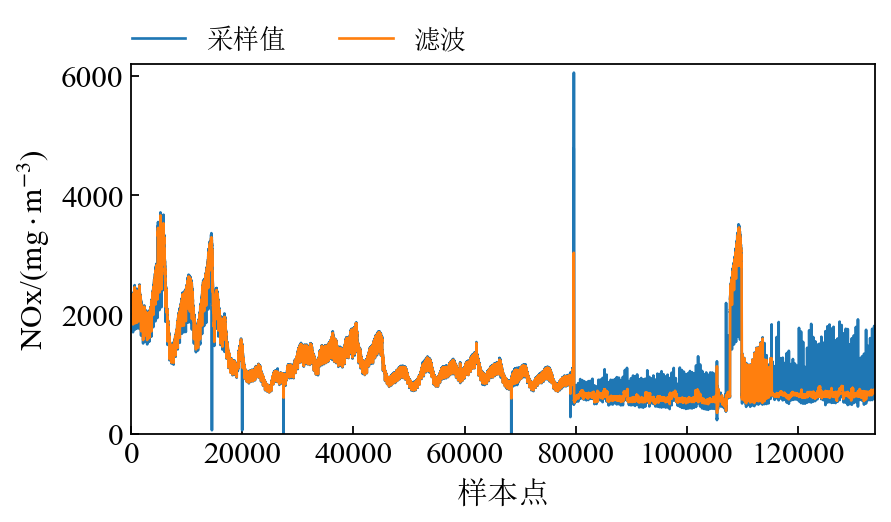

In [214]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']


'''
定义画图可视化模版
'''
def plot_curve(data: dict):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=160)
    for i in range(len(data["x"])):
        ax.plot(data["x"][i],
                data["y"][i],
                color=color_list[i+1],
                linestyle=linesyle_list[i],
                linewidth=1.2)

    if data.get("ylim"):
        ax.set_ylim(data["ylim"])
    else:
        ax.set_ylim([np.percentile(data["y"][i], 0.5), np.percentile(data["y"][i], 99.5)])
    if data.get("xlim"):
        ax.set_xlim(data["xlim"])
    if data.get("xlabel"):
        ax.set_xlabel(data["xlabel"], {"family":"SimSun"})
    if data.get("ylabel"):
        ax.set_ylabel(data["ylabel"], {"family":"times new roman"})
    if data.get("xticks"):
        ax.set_xticks(data["xticks"])
    if data.get("legend"):
        legend_font = {"family": "SimSun", "size": 12}
        fig.legend(data["legend"], frameon=False, bbox_to_anchor=(0.5, 1.01), ncol=2, prop=legend_font)
    plt.show()

# curve_data = {
#     "x": [np.arange(len(nox))],
#     "y": [nox],
#     "ylim": [-200, 6200],
#     "xlim": [0, 134000],
#     "xlabel": "样本点",
#     "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)"
# }

from filter import *
nox_data_valider = DataValid(min_value=50, max_value=5000, step_limit=50, step_value=50)
nox_data_filter = MedianFilter(kernel_size=5)

nox_valid = nox_data_valider.apply(np.array(nox))
nox_filter = nox_data_filter.apply(nox_valid)

curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [nox, nox_filter],
    "ylim": [0, 6200],
    "xlim": [0, 134000],
    "xlabel": "样本点",
    "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)",
    "legend": ["采样值", "滤波"],
}

plot_curve(curve_data)

## CO

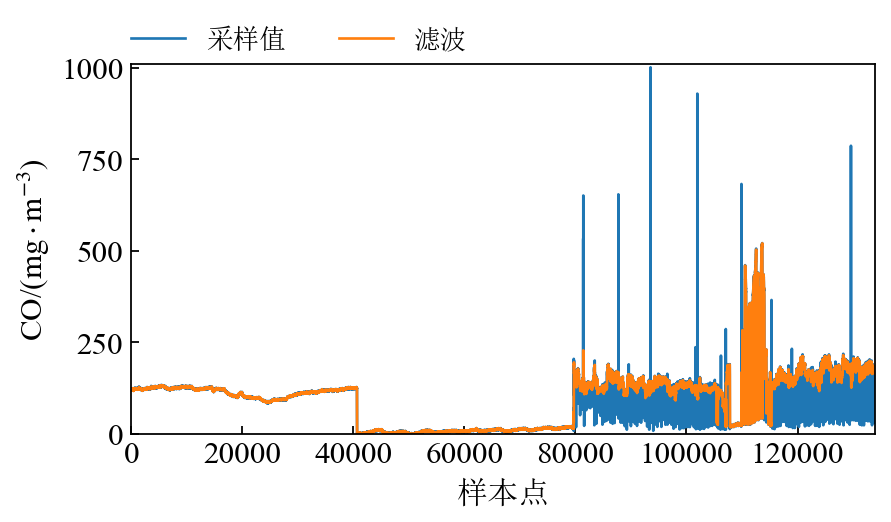

In [215]:
co_data_valider = DataValid(min_value=0, max_value=1000, step_limit=10, step_value=10)
co_data_filter = MedianFilter(kernel_size=5)

co_valid = co_data_valider.apply(np.array(co))
co_filter = co_data_filter.apply(co_valid)

curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [co, co_filter],
    "ylim": [0, 1010],
    "xlim": [0, 134000],
    "xlabel": "样本点",
    "ylabel": "CO/($\mathrm{mg \cdot m^{-3}}$)",
    "legend": ["采样值", "滤波"],
}

plot_curve(curve_data)

## ATEM

In [216]:
def print_distribution(data, points=[0.1,1,2,3,97,98,99,99.9]):
    for point in points:
        print(f"分位数{point}:",np.percentile(data, point))
    data_inc = (np.roll(data, -1) - data)[:-1]
    for point in points:
        print(f"增量分位数{point}:",np.percentile(data_inc, point))

print_distribution(np.array(atem), points=[0.5,1,2,3,95,97,98,99,99.5])    

分位数0.5: 20.278
分位数1: 20.737199999999998
分位数2: 21.299
分位数3: 21.564
分位数95: 132.558
分位数97: 133.4294
分位数98: 134.025
分位数99: 135.0018
分位数99.5: 135.39039999999997
增量分位数0.5: -0.18999999999999773
增量分位数1: -0.1640000000000157
增量分位数2: -0.13999999999998636
增量分位数3: -0.12600000000000122
增量分位数95: 0.11199999999999477
增量分位数97: 0.1280000000000001
增量分位数98: 0.14300000000000068
增量分位数99: 0.1700000000000017
增量分位数99.5: 0.19700000000000273


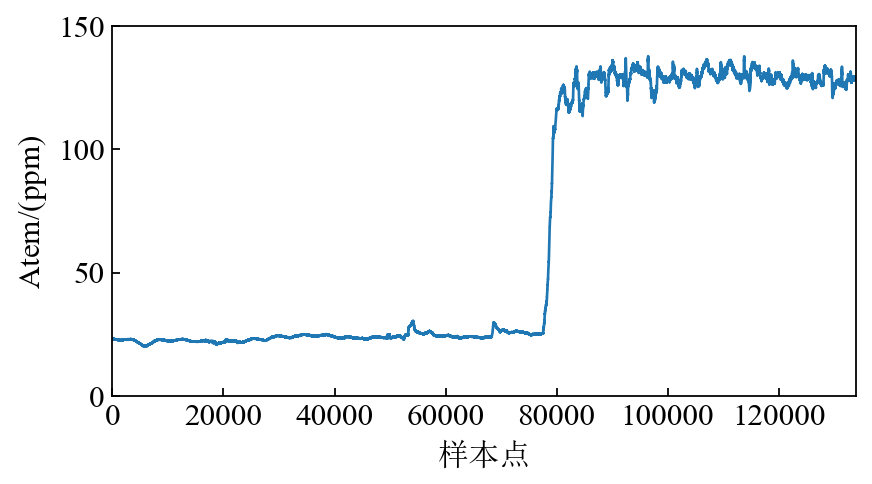

In [217]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [atem],
    "ylim": [0, 150],
    "xlim": [0, 134000],
    "xlabel": "样本点",
    "ylabel": "Atem/($\mathrm{ppm}$)",
}

plot_curve(curve_data)

## BTEM

In [218]:
print_distribution(np.array(btem), points=[0.5,1,2,3,95,97,98,99,99.5])    

分位数0.5: 20.816
分位数1: 20.939
分位数2: 21.253
分位数3: 21.441
分位数95: 136.461
分位数97: 137.2114
分位数98: 137.579
分位数99: 137.9838
分位数99.5: 138.3954
增量分位数0.5: -0.20699999999999363
增量分位数1: -0.18099999999999739
增量分位数2: -0.1529999999999916
增量分位数3: -0.13599999999999568
增量分位数95: 0.11799999999999855
增量分位数97: 0.13899999999998158
增量分位数98: 0.1560000000000059
增量分位数99: 0.18699999999999492
增量分位数99.5: 0.21800000000001774


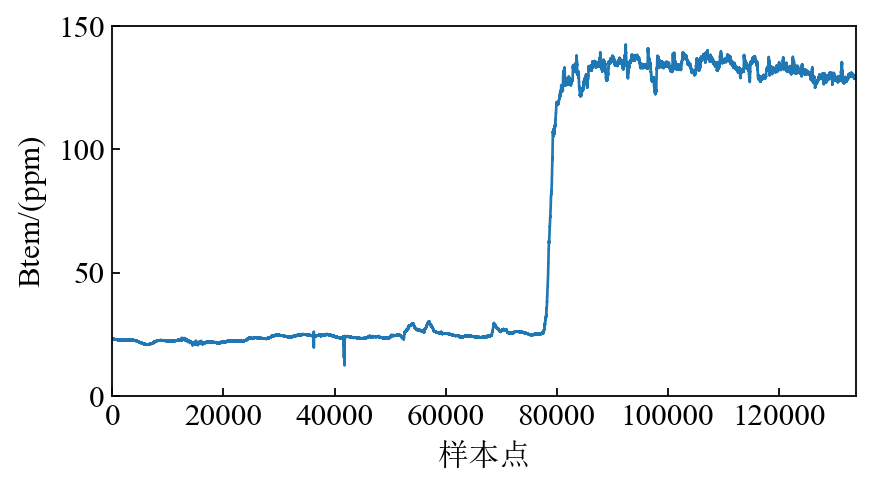

In [219]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [btem],
    "ylim": [0, 150],
    "xlim": [0, 134000],
    "xlabel": "样本点",
    "ylabel": "Btem/($\mathrm{ppm}$)",
}

plot_curve(curve_data)

## O2

In [220]:
print_distribution(np.array(o2), points=[0.1,1,2,3,95,97,98,99,99.5])    

分位数0.1: 4.223920000000001
分位数1: 4.601
分位数2: 4.728
分位数3: 4.803
分位数95: 19.601
分位数97: 19.615
分位数98: 19.632
分位数99: 19.702
分位数99.5: 19.711
增量分位数0.1: -0.3129999999999997
增量分位数1: -0.10899999999999999
增量分位数2: -0.10299999999999976
增量分位数3: -0.10199999999999942
增量分位数95: 0.09999999999999964
增量分位数97: 0.10199999999999942
增量分位数98: 0.10299999999999976
增量分位数99: 0.10599999999999987
增量分位数99.5: 0.20500000000000007


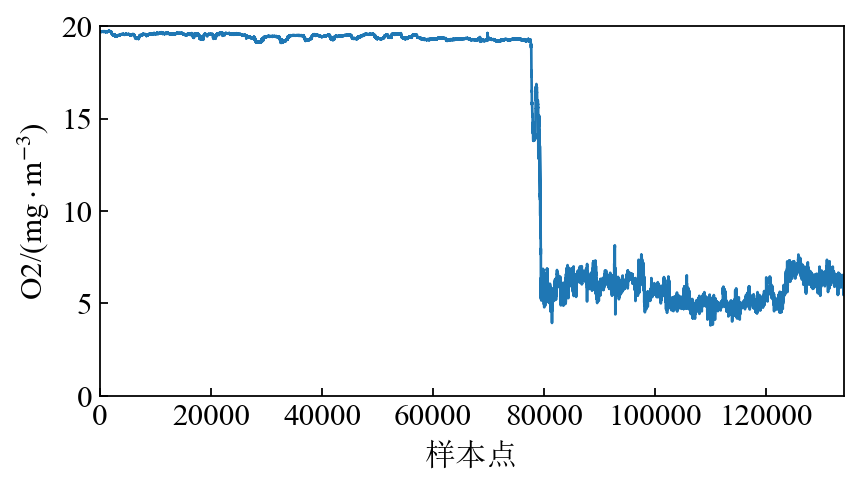

In [221]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [o2],
    "ylim": [0, 20],
    "xlim": [0, 134000],
    "xlabel": "样本点",
    "ylabel": "O2/($\mathrm{mg \cdot m^{-3}}$)",
}

plot_curve(curve_data)

## LOAD

In [222]:
print_distribution(np.array(load), points=[0.1,1,2,3,95,97,98,99,99.5])    

分位数0.1: 0.0
分位数1: 0.0
分位数2: 0.0
分位数3: 0.0
分位数95: 262.483
分位数97: 263.9814
分位数98: 265.018
分位数99: 270.2516
分位数99.5: 270.886
增量分位数0.1: -3.8311619999999897
增量分位数1: -1.9728099999999893
增量分位数2: -1.3859999999999957
增量分位数3: -1.0730000000000075
增量分位数95: 0.7229999999999578
增量分位数97: 1.092000000000013
增量分位数98: 1.4180000000000064
增量分位数99: 2.0674299999999795
增量分位数99.5: 2.7846199999999848


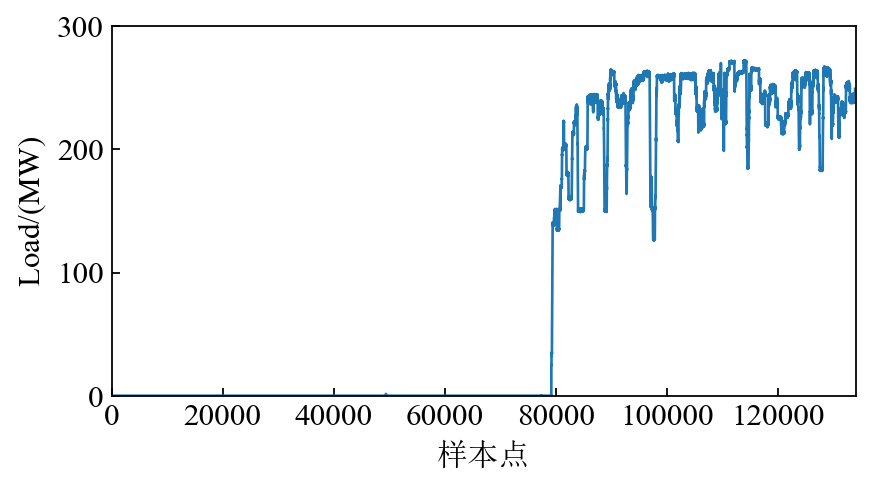

In [223]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [load],
    "ylim": [0, 300],
    "xlim": [0, 134000],
    "xlabel": "样本点",
    "ylabel": "Load/($\mathrm{MW}$)",
}

plot_curve(curve_data)

# 5. 锅炉热效率计算

# 6. 保存数据

In [224]:
def dataFrameAppend(data: pd.DataFrame, columns:dict, file_name: str):
    for key,value in columns.items():
        data[key] = value
    data.to_csv(file_name, index=False)
    
new_columns = {
    "nox_filter": nox_filter,
    "co_filter": co_filter,
}

dataFrameAppend(data, new_columns, file_name="DATA3_filter.csv")

In [225]:
data = pd.read_csv('DATA3_filter.csv')

In [226]:
data

,MW,3UCCSPT,3U03TEA,3UZQFT,3U05TE01,3U06PT04,3U80FT04,3U80FT05,3UTAFF,3U72PT04,...,3U71MCV07CK,3U71MCV07DK,3USOFABJ1ZT,3U78TE02A,3U78TE02B,30ACO0001,D21P61B03,DATETIME,nox_filter,co_filter
0,0.000,0.024,27.609,0.814,21.745,0.008,1.786,0.000,0.000,0.000,...,100.260,99.772,24.863,23.103,22.976,120.079,2220.480,2024-07-01 00:00:00,2220.4800,120.0790
1,0.000,0.024,27.609,0.814,21.739,0.008,1.786,0.000,0.000,0.000,...,100.260,99.772,24.863,23.103,22.976,120.003,2233.270,2024-07-01 00:00:20,2223.0380,120.0638
2,0.000,0.024,27.609,0.814,21.726,0.009,1.786,0.000,0.000,0.000,...,100.260,99.772,24.863,23.103,23.024,120.003,2242.525,2024-07-01 00:00:40,2227.4470,120.0486
3,0.000,0.024,27.622,0.814,21.764,0.009,1.786,0.000,0.000,0.000,...,100.260,99.740,24.863,23.109,23.024,120.003,2217.094,2024-07-01 00:01:00,2226.7698,120.0334
4,0.000,0.024,27.622,0.814,21.764,0.008,1.786,0.000,0.000,0.000,...,100.260,99.740,24.863,23.109,23.024,120.003,2228.193,2024-07-01 00:01:20,2228.3124,120.0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133916,246.152,16.659,542.411,716.556,535.100,2.839,9.375,0.685,227.680,3.208,...,100.260,99.772,0.000,129.202,129.977,166.768,707.593,2024-07-31 23:58:40,700.7434,168.5992
133917,248.008,16.626,542.397,721.312,535.189,2.835,9.013,0.685,227.873,3.208,...,100.293,99.772,0.000,129.157,130.028,165.395,706.312,2024-07-31 23:59:00,703.6288,168.3246
133918,248.125,16.626,542.273,723.370,534.814,2.835,8.790,0.685,227.686,3.198,...,100.293,99.740,0.000,129.215,129.901,166.768,703.617,2024-07-31 23:59:20,705.1050,167.4090
133919,247.497,16.626,542.441,711.865,535.046,2.835,8.790,0.712,228.089,3.198,...,100.293,99.740,0.000,129.251,129.829,168.294,702.694,2024-07-31 23:59:40,704.8950,167.1038
